<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/klasifikasigambarrevisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [4]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [5]:
!ls

 amazon_prime_titles.csv	 Mall_Customers.csv
 best_model.h5			 OdfDTwgPVdW9XbE7.png
 combined_dataset.csv		 rockpaperscissors
 day.csv			 rock_paper_scissors_final_model.h5
'e-shop clothing 2008.csv'	 rock_paper_scissors_model.h5
'e-shop clothing 2008.csv.zip'	'Salinan amazon_prime_titles.csv'
 hour.csv			 udemy_output_All_Finance__Accounting_p1_p626.csv
 kaggle.json


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Epoch 1/100
41/41 [==============================] - 30s 681ms/step - loss: 1.2041 - accuracy: 0.4204 - val_loss: 1.0841 - val_accuracy: 0.3565
Epoch 2/100
41/41 [==============================] - 25s 610ms/step - loss: 1.0033 - accuracy: 0.5016 - val_loss: 0.7863 - val_accuracy: 0.7049
Epoch 3/100
41/41 [==============================] - 22s 548ms/step - loss: 0.7679 - accuracy: 0.6732 - val_loss: 0.6394 - val_accuracy: 0.6956
Epoch 4/100
41/41 [==============================] - 21s 522ms/step - loss: 0.6286 - accuracy: 0.7473 - val_loss: 0.4695 - val_accuracy: 0.8310
Epoch 5/100
41/41 [==============================] - 24s 598ms/step - loss: 0.5314 - accuracy: 0.7949 - val_loss: 0.4233 - val_accuracy: 0.8403
Epoch 6/100
41/41 [==============================] - 20s 503ms/step - loss: 0.4447 - accuracy: 0.8245 - val_loss: 0.4316 - val_accuracy: 0.8356
Epoch 7/100
41/41 [==============================] - 23s 569ms/step - loss: 0.3987 - accuracy: 0.8370 - val_loss: 0.3861 - val_accuracy:

Saving 0t08v9bAaA0mXGCQ.png to 0t08v9bAaA0mXGCQ.png


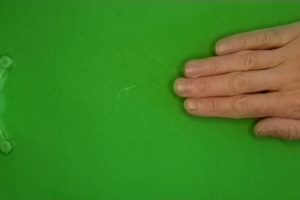

1/1 [==============================] - 0s 274ms/step
Predicted class: Paper


In [9]:
# Impor library yang diperlukan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
import numpy as np

from google.colab import files
from IPython.display import Image

# Definisi path dataset
train_dir = '/content/gdrive/My Drive/Kaggle/rockpaperscissors/rps-cv-images'

# Membuat objek ImageDataGenerator untuk augmentasi gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4  # Pembagian dataset menjadi training dan validation
)

# Membagi dataset menjadi training dan validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Membuat model Sequential
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

# Kompilasi model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

# Menyimpan model dengan callback ModelCheckpoint
model_checkpoint = ModelCheckpoint('rock_paper_scissors_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

# Melatih model dengan early stopping jika akurasi mencapai 85%
early_stopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, verbose=1)

# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,  # Anda perlu menyesuaikan jumlah epoch sesuai kebutuhan
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    callbacks=[model_checkpoint, early_stopping]
)

# Menyimpan model terakhir
model.save('rock_paper_scissors_final_model.h5')

# Fungsi untuk memprediksi gambar yang diunggah
def predict_uploaded_image(file_path):
    img = image.load_img(file_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0

    result = model.predict(img)
    class_index = np.argmax(result)

    if class_index == 0:
        return 'Paper'
    elif class_index == 1:
        return 'Rock'
    else:
        return 'Scissors'

# Fungsi untuk mengunggah gambar
def upload_and_predict():
    uploaded = files.upload()
    for fn in uploaded.keys():
        img_path = fn
        display(Image(img_path))
        predicted_class = predict_uploaded_image(img_path)
        print(f'Predicted class: {predicted_class}')

# Tombol untuk mengunggah gambar
upload_button = files.upload()

# Melakukan prediksi saat gambar diunggah
if len(upload_button) > 0:
    for img_path in upload_button.keys():
        display(Image(img_path))
        predicted_class = predict_uploaded_image(img_path)
        print(f'Predicted class: {predicted_class}')